In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = "city_data.csv"
df2 = "ride_data.csv"

city_df = pd.read_csv(df1)
ride_df = pd.read_csv(df2)

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [2]:
#Merge DF's and Groupby

complete_df = pd.merge(city_df, ride_df, how="left", on=["city", "city"])
complete_groupby = complete_df.groupby('city')

In [3]:
#Average Fare Per City

fare_city = complete_groupby.mean()['fare']

#Rides per city

rides = complete_groupby.count()['fare']

#Drivers Per City

drivers = complete_groupby.mean()['driver_count']

#Total Fares
fare_total = complete_groupby.sum()['fare']


In [4]:
#Reset DF

complete_df.set_index('city', inplace= True)
complete_df['avg_fare'] = fare_city
complete_df['ride_count'] = rides
complete_df['driver_count'] = drivers
complete_df['total_fare'] = fare_total

In [5]:
#Dataframe by city

urban = complete_df.loc[complete_df["type"] == 'Urban', :]
suburban = complete_df.loc[complete_df["type"] == 'Suburban', :]
rural = complete_df.loc[complete_df["type"] == 'Rural', :]


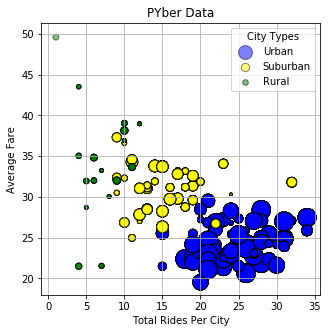

In [6]:
#Bubble plot

plt.figure(figsize= (5, 5))

urban = plt.scatter(urban['ride_count'], urban['avg_fare'], c='blue', s=5*urban['driver_count'], edgecolors='black', alpha=0.5, label='Urban')
suburban = plt.scatter(suburban['ride_count'], suburban['avg_fare'], c='yellow', s=5*suburban['driver_count'], edgecolors='black', alpha=0.5, label='Suburban')
rural = plt.scatter(rural['ride_count'], rural['avg_fare'], c='green', s=5*rural['driver_count'], edgecolors='black', alpha=0.5, label='Rural')

plt.grid()
plt.ylabel("Average Fare")
plt.xlabel("Total Rides Per City")

lgnd = plt.legend(fontsize="medium", mode="expanded", numpoints=1, scatterpoints=1, loc="best", title="City Types", labelspacing=0.5)
plt.title("PYber Data")
plt.show()

In [7]:
#% Total Fares Per City Type & Pie Chart

#Reset DF and Groupby City Type

fares_df = complete_df.reset_index()
fares_df = fares_df.groupby('type').sum()

#% Total Fare by City Type

fares_df['percent_fare'] = 100 * (fares_df['total_fare'] / fares_df.total_fare.sum())
fares_df

,driver_count,fare,ride_id,avg_fare,ride_count,total_fare,percent_fare
type,,,,,,,
Rural,727.0,4255.09,658729360193746,4255.09,1015,35130.15,2.551708
Suburban,9730.0,19317.88,3006404300903080,19317.88,10403,321781.79,23.372894
Urban,64501.0,40078.34,7890194186030600,40078.34,41251,1019818.67,74.075397


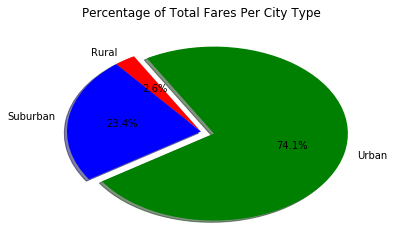

In [8]:
#% Total Fare by City Type Pie Chart

plt.pie(fares_df['percent_fare'], labels=["Rural", "Suburban", "Urban"], 
        colors=["red", "blue", "green"], explode=[0,0,0.1], autopct='%1.1f%%',shadow=True, startangle=120)
plt.title("Percentage of Total Fares Per City Type")
plt.show()

In [9]:
#% Total Rides Per City Type

#Reset DF and Groupby City Type
rides_df = complete_df.reset_index()
rides_df = rides_df.groupby('type').sum()

#% Total Fare by City Type
rides_df['percent_fare'] = 100 * (rides_df['ride_count'] / rides_df.ride_count.sum())
rides_df

,driver_count,fare,ride_id,avg_fare,ride_count,total_fare,percent_fare
type,,,,,,,
Rural,727.0,4255.09,658729360193746,4255.09,1015,35130.15,1.927130
Suburban,9730.0,19317.88,3006404300903080,19317.88,10403,321781.79,19.751657
Urban,64501.0,40078.34,7890194186030600,40078.34,41251,1019818.67,78.321214


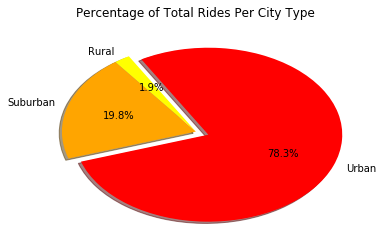

In [10]:
#% Total Rides by City Type Pie Chart

plt.pie(rides_df['percent_fare'], labels=["Rural", "Suburban", "Urban"], 
        colors=["yellow", "orange", "red"], explode=[0,0,0.1], autopct='%1.1f%%',shadow=True, startangle=120)
plt.title("Percentage of Total Rides Per City Type")
plt.show()

In [11]:
#% Total Rides Per City Type

#Reset DF and Groupby City Type
drivers_df = complete_df.reset_index()
drivers_df = drivers_df.groupby('type').sum()

#% Total Fare by City Type
drivers_df['percent_fare'] = 100 * (drivers_df['driver_count'] / drivers_df.driver_count.sum())
drivers_df

,driver_count,fare,ride_id,avg_fare,ride_count,total_fare,percent_fare
type,,,,,,,
Rural,727.0,4255.09,658729360193746,4255.09,1015,35130.15,0.969876
Suburban,9730.0,19317.88,3006404300903080,19317.88,10403,321781.79,12.980602
Urban,64501.0,40078.34,7890194186030600,40078.34,41251,1019818.67,86.049521


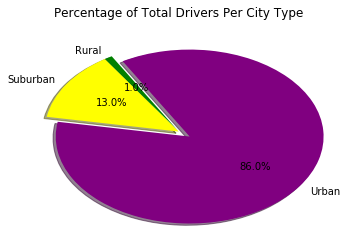

In [12]:
#% Total Drivers by City Type Pie Chart

plt.pie(drivers_df['percent_fare'], labels=["Rural", "Suburban", "Urban"], 
        colors=["green", "yellow", "purple"], explode=[0,0,0.1], autopct='%1.1f%%',shadow=True, startangle=120)
plt.title("Percentage of Total Drivers Per City Type")
plt.show()

In [13]:
# Three observable trends based on the Data:
    #1. The total amount of fares, rides and drivers are significantly higher in the Urban area, which points to a higher population density in the Urban area.
    #2. Drivers in Rural areas make about 3 times as much per driver compared to drivers in Urban areas. This says that the driver density is greater in Urban areas compared to Rural areas.
    #3. The Rural average fare per ride is 4 times higher than the Urban avaerage fare per ride, saying that riders take shorter rides more frequently in this area.